### Ajuste de modelos

* A partir de las transformaciones propuestas ajustar distintos modelos (S)ARIMA. Extraer orden, parámetros, coeficientes numéricos y análisis de la bondad del modelo.
* Ajustar y predecir usando redes neuronales LSTM.
* Comparar con predicciones usando SARIMA y extraer conclusiones.
* **Realizar el análisis espectral de la serie original. Hallar las frecuencias principales y comparar con las componentes cíclica y estacional usando la descomposición.**

In [67]:
from imports import *
from utils import process_file
from scipy.signal import periodogram

%matplotlib widget

In [8]:
warnings.filterwarnings("ignore")

#### Cargamos dataset ya preprocesado

In [9]:
bicis_data = process_file()
type(bicis_data)

pandas.core.series.Series

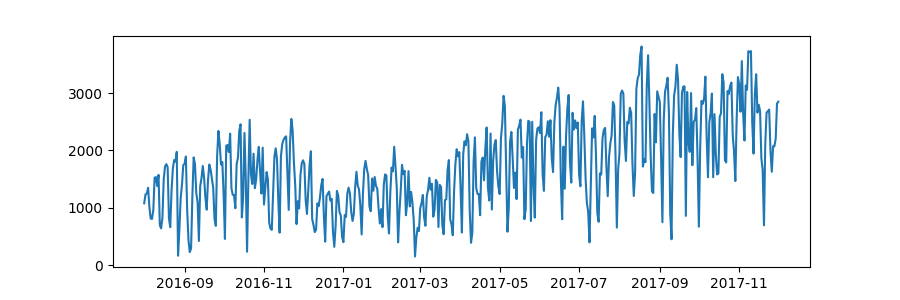

In [74]:
plt.figure(figsize=(9, 3))
plt.plot(bicis_data)

#### Periodograma sobre la serie original

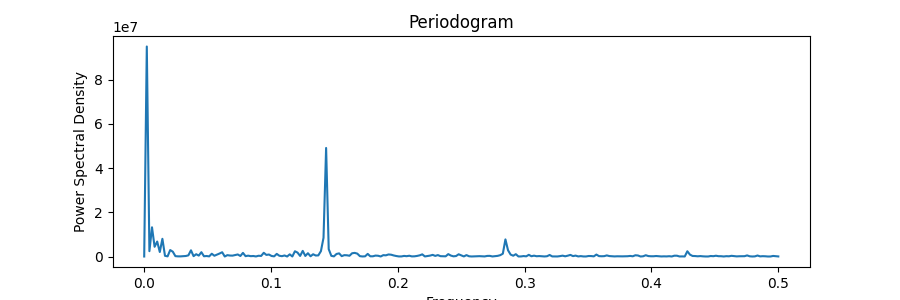

In [75]:
frequencies, power_spectrum = periodogram(bicis_data)

plt.figure(figsize=(9, 3))
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram')
plt.show()

#### Periodograma sobre la serie diferenciada

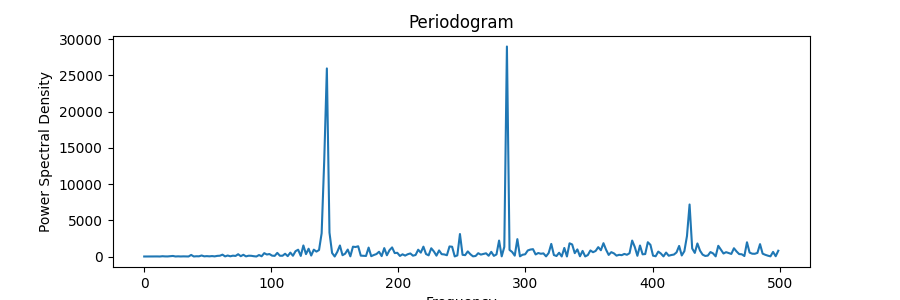

In [77]:
# Diferencio la serie y computo periodograma

fs = 1000
bicis_diff = bicis_data.diff().dropna()
frequencies, power_spectrum = periodogram(bicis_diff, fs)

plt.figure(figsize=(9, 3))
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram')
plt.show()


Se puede observar el piso de ruido y dos componentes marcadas en las frecuencias 0.15 y 0.3.
El hecho de que la densidad espectral de potencia (PSD) aumenta hacia frecuencias más bajas indica que hay más potencia en los componentes de baja frecuencia de la señal. Esto significa que la tendencia en el alquiler de bicicletas, en lugar de las fluctuaciones de alta frecuencia, domina la señal.

En otras palabras, el gráfico nos sugiere que el número de bicicletas alquiladas ha estado aumentando con el tiempo, algo que tambien podemos observar en el grafico de la serie original. 



#### Periodograma sobre la serie sin la tendencia (detrend)

In [29]:
from scipy.signal import detrend
detrended_data = detrend(bicis_data, type='linear')


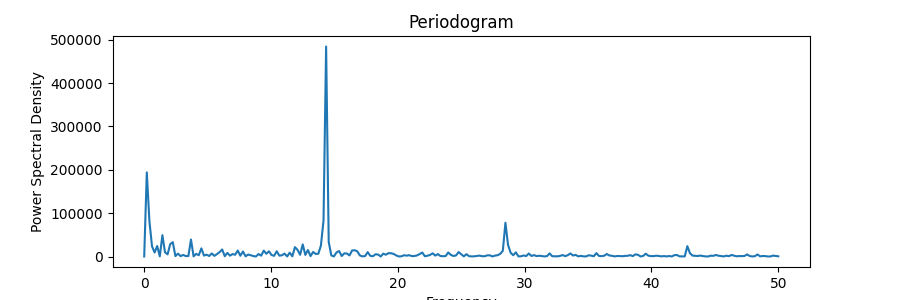

In [79]:

fs = 100
frequencies, power_spectrum = periodogram(detrended_data, fs)

plt.figure(figsize=(9, 3))
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram')
plt.show()

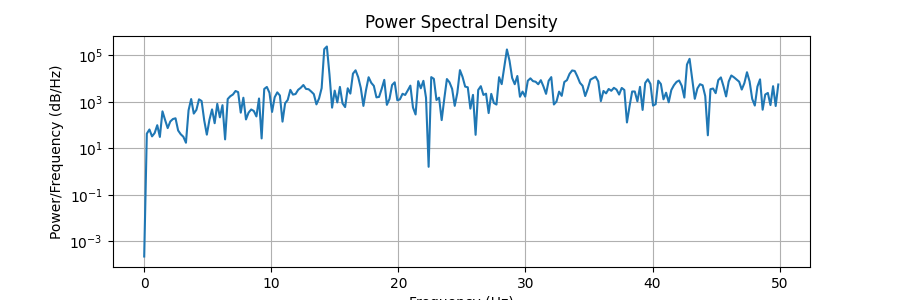

In [81]:
from scipy.signal import welch
# Sampling frequency
fs = 100  # Hz

frequencies, psd = welch(bicis_diff,fs, nperseg=1024)

# Plot the PSD
plt.figure(figsize=(9, 3))
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()


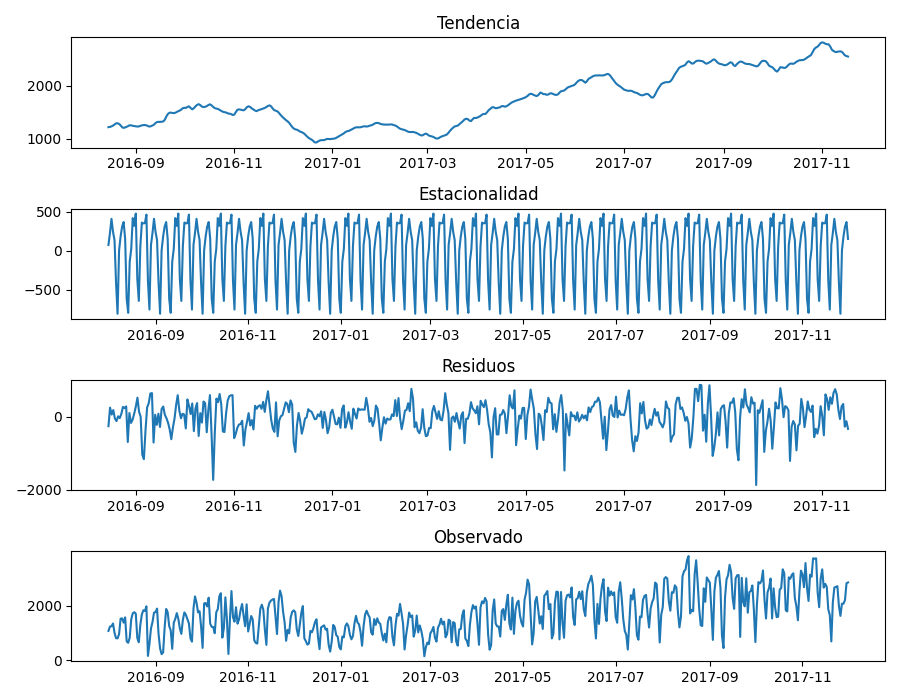

In [83]:
decomposition = seasonal_decompose(bicis_data, model='additive', period=28)

plt.figure(figsize=(9, 7))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend)
plt.title('Tendencia')

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal)
plt.title('Estacionalidad')

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid)
plt.title('Residuos')

plt.subplot(4, 1, 4)
plt.plot(decomposition.observed)
plt.title('Observado')

plt.tight_layout()
plt.show()